In [3]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols, glm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#import the merged data set
HumanA= pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv')
HumanA.dropna(axis=0, inplace=True)
HumanAf = HumanA[HumanA['ID'] != 4623]

In [7]:
HumanA.head()

Unnamed: 0     ID  Alter   Global  Overview  Cardinal  \
0           0  365.0    37.0     5.6  6.285714       2.5   
1           1  365.0    37.0     5.6  6.285714       2.5   
2           2  365.0    37.0     5.6  6.285714       2.5   
3           3  365.0    37.0     5.6  6.285714       2.5   
4           4  365.0    37.0     5.6  6.285714       2.5   

   AffiliativeQ_average  item3  ContextQ_average  remember_action_likert  ...  \
0                   5.2    2.0               3.5                2.714286  ...   
1                   5.2    2.0               3.5                2.714286  ...   
2                   5.2    2.0               3.5                2.714286  ...   
3                   5.2    2.0               3.5                2.714286  ...   
4                   5.2    2.0               3.5                2.714286  ...   

   DistanceToParticipant  PointingTaskStartingLocations  TrialNumber  \
0             197.768723                           21.0          1.0   
1             213.475525                           16.0         78.0   
2             111.623512                           13.0         88.0   
3             111.623512                           13.0         95.0   
4             232.765823                            8.0        131.0   

   StartPointID  ID_for_StartingPosition  avatarID  AvatarPresenceCategory  \
0           1.0                      1.0      46.0                 Present   
1           7.0                      6.0      46.0                 Omitted   
2           8.0                      4.0      46.0                 Present   
3           8.0                     11.0      46.0                 Omitted   
4          11.0                     11.0      46.0                 Omitted   

   Context  meaningfulBuilding  ImageName  
0    False      Not meaningful      46_Sa  
1    False      Not meaningful    46_SaNo  
2    False      Not meaningful      46_Sa  
3    False      Not meaningful    46_SaNo  
4    False      Not meaningful    46_SaNo  

[5 rows x 29 columns]

In [3]:
# Define probability distribution for the response variable for the linear (LM) and logistic (GLM) model
family_LM = sm.families.Gaussian()
family_GLM = sm.families.Binomial()

## Order effects

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/1342475989.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x='AbsolutError', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/1342475989.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.kdeplot(x='AbsolutError', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)


Text(0.5, 0, 'Residuals')

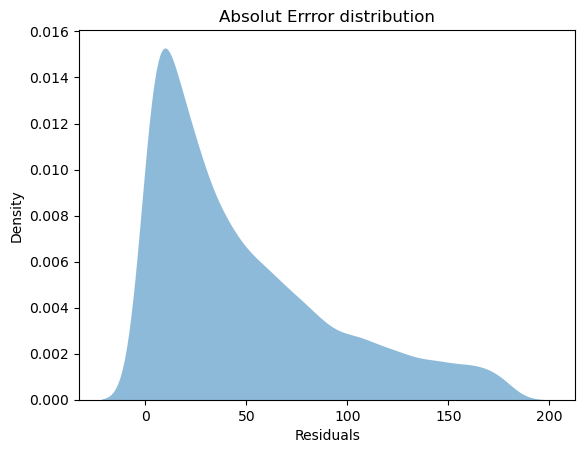

In [4]:
#Plotting KDE for first independent variable
ax = sns.kdeplot(x='AbsolutError', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("Absolut Errror distribution")
ax.set_xlabel("Residuals")

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/3432156858.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x='RT', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/3432156858.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.kdeplot(x='RT', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)


Text(0.5, 0, 'Residuals')

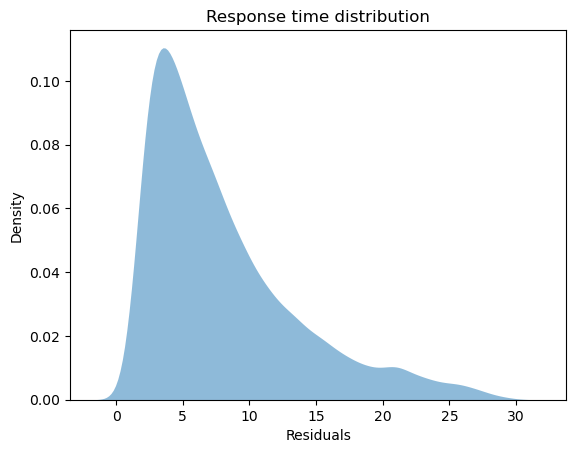

In [5]:
#Plotting KDE for second independent variable
ax = sns.kdeplot(x='RT', data= HumanAf, shade='fill', palette='Crest', alpha=.5, linewidth=0,)
ax.set_title("Response time distribution")
ax.set_xlabel("Residuals")

In [6]:
# Response time predicted by trial order in each starting location
formula = 'np.log(RT) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                                Mixed Linear Model Regression Results
Model:                            MixedLM                Dependent Variable:                np.log(RT)
No. Observations:                 9381                   Method:                            REML      
No. Groups:                       28                     Scale:                             0.3309    
Min. group size:                  329                    Log-Likelihood:                    -8208.7384
Max. group size:                  336                    Converged:                         No        
Mean group size:                  335.0                                                               
------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------------
Int

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 16.239516
  warnings.warn(msg, ConvergenceWarning)


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/2444281106.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/2444281106.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)


Text(0.5, 24.0, 'Residuals')

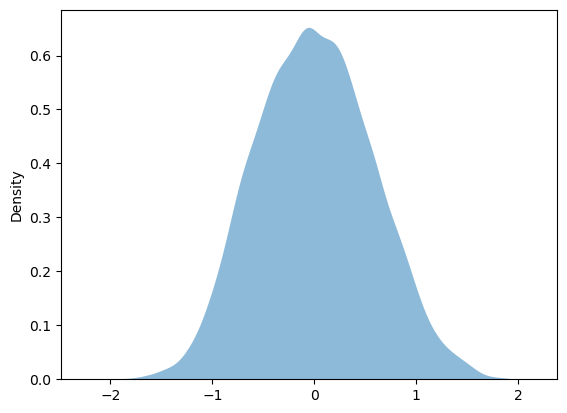

In [7]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

### CONCLUSION
__________________
Subjects are **significantly** slower on the first three trials in each pointing position.

In [8]:
# Response time predicted by trial order in each starting location
formula = 'np.log(AbsolutError) ~ C(ID_for_StartingPosition, Treatment(reference=12))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                Mixed Linear Model Regression Results
Model:                        MixedLM             Dependent Variable:             np.log(AbsolutError)
No. Observations:             9381                Method:                         REML                
No. Groups:                   28                  Scale:                          1.7225              
Min. group size:              329                 Log-Likelihood:                 -15931.9351         
Max. group size:              336                 Converged:                      Yes                 
Mean group size:              335.0                                                                   
------------------------------------------------------------------------------------------------------
                                                            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------------------
Int

### Result
__________________
Subjects do not significantly differ in their precision across time spent at pointing position.


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/2444281106.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/2444281106.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)


Text(0.5, 24.0, 'Residuals')

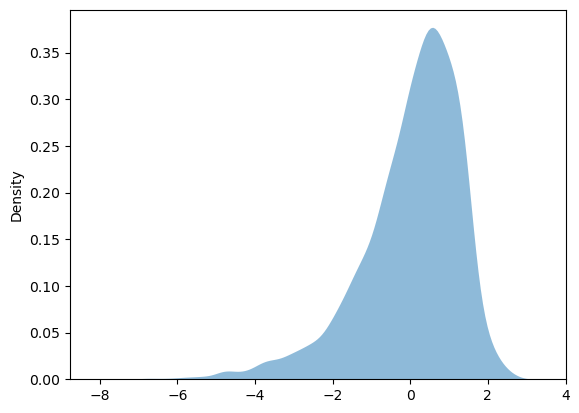

In [9]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [10]:
# Response time predicted by trial order at the overall test
formula = 'np.log(AbsolutError) ~ C(StartPointID, Treatment(reference=14))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                           Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         np.log(AbsolutError)
No. Observations:          9381            Method:                     REML                
No. Groups:                28              Scale:                      1.7179              
Min. group size:           329             Log-Likelihood:             -15933.9895         
Max. group size:           336             Converged:                  Yes                 
Mean group size:           335.0                                                           
-------------------------------------------------------------------------------------------
                                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------------
Intercept                                         3.236    0.113 28.640 0.000  3.015  3.457
C(StartPointID,

### Result
__________________
Subjects are in average 1.5 seconds slower during  the first 10 trials


In [11]:
# Response time predicted by trial order for the overall test
formula = 'RT ~ C(StartPointID, Treatment(reference=27))'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                          Mixed Linear Model Regression Results
Model:                       MixedLM            Dependent Variable:            RT         
No. Observations:            9381               Method:                        REML       
No. Groups:                  28                 Scale:                         25.2444    
Min. group size:             329                Log-Likelihood:                -28504.6779
Max. group size:             336                Converged:                     Yes        
Mean group size:             335.0                                                        
------------------------------------------------------------------------------------------
                                                 Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
Intercept                                        6.089    0.461 13.195 0.000  5.184  6.993
C(StartPointID, Treatment(

### Result
__________________
Subjects accuracy does not increase throughout the task


### CONCLUSION
__________________
Subjects accuracy does not improve through the task, but their responsable does. This could be evidence of a learning effect of the testing format that does not enhance their performance. Their knwoledge is stable throughout.

## The two factor interaction: Meaningfulness*Presence

In [12]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "np.log(AbsolutError) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory) + C(Context, Treatment(reference=False))*C(AvatarPresenceCategory)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                                            Mixed Linear Model Regression Results
Model:                                MixedLM                     Dependent Variable:                     np.log(AbsolutError)
No. Observations:                     9381                        Method:                                 REML                
No. Groups:                           28                          Scale:                                  1.7197              
Min. group size:                      329                         Log-Likelihood:                         -15913.5130         
Max. group size:                      336                         Converged:                              Yes                 
Mean group size:                      335.0                                                                                   
------------------------------------------------------------------------------------------------------------------------------
                             

In [13]:
HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]] = HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]].astype(int)
HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]] = HumanAf[["ID", "avatarID", "PointingTaskStartingLocations", "StartPointID"]].values.astype(str)

In [14]:
HumanAf["ID_StartPointID"] =str(HumanAf['ID']) + "_" + str(HumanAf['StartPointID'])


In [15]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "np.log(AbsolutError) ~  C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory)  + C(AvatarPresenceCategory)*C(Context, Treatment(reference=False))"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID_StartPointID']).fit()
print(model_LM.summary())

                                              Mixed Linear Model Regression Results
Model:                                 MixedLM                      Dependent Variable:                      np.log(AbsolutError)
No. Observations:                      9381                         Method:                                  REML                
No. Groups:                            1                            Scale:                                   1.9260              
Min. group size:                       9381                         Log-Likelihood:                          -16394.0763         
Max. group size:                       9381                         Converged:                               Yes                 
Mean group size:                       9381.0                                                                                    
---------------------------------------------------------------------------------------------------------------------------------
      

In [16]:
HumanAf["ID_PointingTaskStartingLocations"] = HumanAf.loc[:,"ID"] + "_" + HumanAf.loc[:,"PointingTaskStartingLocations"]

In [17]:
HumanAf["ID_PointingTaskStartingLocations"].head()

0    365_21
1    365_16
2    365_13
3    365_13
4     365_8
Name: ID_PointingTaskStartingLocations, dtype: object

In [18]:
# Whithout global landmarks
HumanAfnoL = HumanAf[(HumanAf.avatarID != 27) | (HumanAf.avatarID != 28) | (HumanAf.avatarID != 55)| (HumanAf.avatarID != 56)]


In [19]:
# Absolute predicted by Avatar Presence + Avatar Category
formula = "np.log(AbsolutError) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory) + C(Context, Treatment(reference=False)):C(AvatarPresenceCategory)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID_PointingTaskStartingLocations']).fit()
print(model_LM.summary())

                                            Mixed Linear Model Regression Results
Model:                                MixedLM                     Dependent Variable:                     np.log(AbsolutError)
No. Observations:                     9381                        Method:                                 REML                
No. Groups:                           784                         Scale:                                  1.6275              
Min. group size:                      9                           Log-Likelihood:                         -16059.4527         
Max. group size:                      12                          Converged:                              Yes                 
Mean group size:                      12.0                                                                                    
------------------------------------------------------------------------------------------------------------------------------
                             

In [20]:
from statsmodels.stats.anova import AnovaRM
print(AnovaRM(data=HumanAfnoL, depvar='RT', subject='ID', within=['Context', 'AvatarPresenceCategory'], aggregate_func = 'mean').fit())

                           Anova
                               F Value Num DF  Den DF Pr > F
------------------------------------------------------------
Context                         0.2085 1.0000 27.0000 0.6516
AvatarPresenceCategory          1.3191 1.0000 27.0000 0.2608
Context:AvatarPresenceCategory  1.9845 1.0000 27.0000 0.1703



/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/2444281106.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/2444281106.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)


Text(0.5, 24.0, 'Residuals')

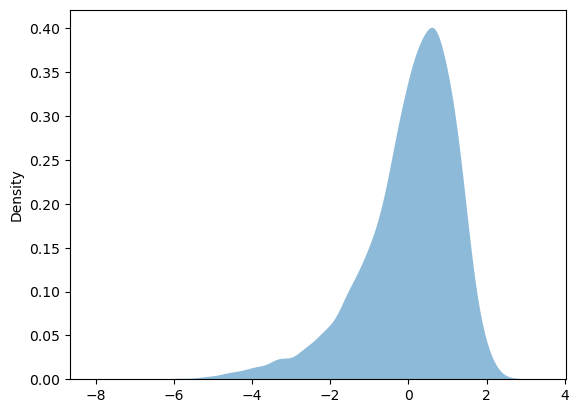

In [21]:
#Plotting residual to check for a normal distribution
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals (Blue) and Normal Distribution (Black)")
ax.set_xlabel("Residuals")

In [22]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ C(Context, Treatment(reference=False)) + C(AvatarPresenceCategory) + C(Context, Treatment(reference=False))*C(AvatarPresenceCategory)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2201: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


                                            Mixed Linear Model Regression Results
Model:                                    MixedLM                        Dependent Variable:                        np.log(RT)
No. Observations:                         9381                           Method:                                    REML      
No. Groups:                               28                             Scale:                                     0.4033    
Min. group size:                          329                            Log-Likelihood:                            -9120.0793
Max. group size:                          336                            Converged:                                 No        
Mean group size:                          335.0                                                                               
------------------------------------------------------------------------------------------------------------------------------
                             

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2207: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2219: ConvergenceWarning: Gradient optimization failed, |grad| = 3.796513
  warnings.warn(msg, ConvergenceWarning)


In [23]:
HumanAf.groupby('Context')['AbsolutError'].median()

Context
False    37.237238
True     31.087897
Name: AbsolutError, dtype: float64

In [24]:
HumanAf.groupby(['Context'])['RT'].std()

Context
False    5.711605
True     5.525178
Name: RT, dtype: float64

In [25]:
# Absolut error predicted by location
formula = "np.log(AbsolutError) ~ C(avatarID)"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(AbsolutError)
No. Observations: 9381    Method:             REML                
No. Groups:       28      Scale:              1.6336              
Min. group size:  329     Log-Likelihood:     -15714.4183         
Max. group size:  336     Converged:          Yes                 
Mean group size:  335.0                                           
-------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept            2.992     0.129  23.206  0.000   2.739   3.244
C(avatarID)[T.10]    0.584     0.140   4.185  0.000   0.310   0.857
C(avatarID)[T.11]   -0.109     0.139  -0.782  0.434  -0.382   0.164
C(avatarID)[T.12]    0.658     0.136   4.836  0.000   0.391   0.924
C(avatarID)[T.13]    0.360     0.137   2.632  0.008   0.092   0.629
C(

## FRS questionnaire analysis

In [26]:
# Absolut error predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(RT)
No. Observations: 9381    Method:             REML      
No. Groups:       28      Scale:              0.4037    
Min. group size:  329     Log-Likelihood:     -9120.1481
Max. group size:  336     Converged:          Yes       
Mean group size:  335.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.986    0.247  8.057 0.000  1.503  2.469
Global         0.039    0.059  0.662 0.508 -0.076  0.154
Overview      -0.073    0.040 -1.841 0.066 -0.151  0.005
Cardinal      -0.009    0.052 -0.167 0.868 -0.110  0.093
Group Var      0.073    0.034                           



In [27]:
# Absolut error predicted by FRS
formula = "AbsolutError ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: AbsolutError
No. Observations: 9381    Method:             REML        
No. Groups:       28      Scale:              1808.6960   
Min. group size:  329     Log-Likelihood:     -48533.5394 
Max. group size:  336     Converged:          Yes         
Mean group size:  335.0                                   
-----------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   68.484    13.211   5.184  0.000  42.592  94.376
Global      -3.443     3.152  -1.092  0.275  -9.621   2.735
Overview     0.784     2.129   0.368  0.713  -3.389   4.957
Cardinal    -3.328     2.772  -1.201  0.230  -8.761   2.104
Group Var  207.599     1.448                               



/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/94257684.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=fill`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/94257684.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)


Text(0.5, 0, 'Residuals')

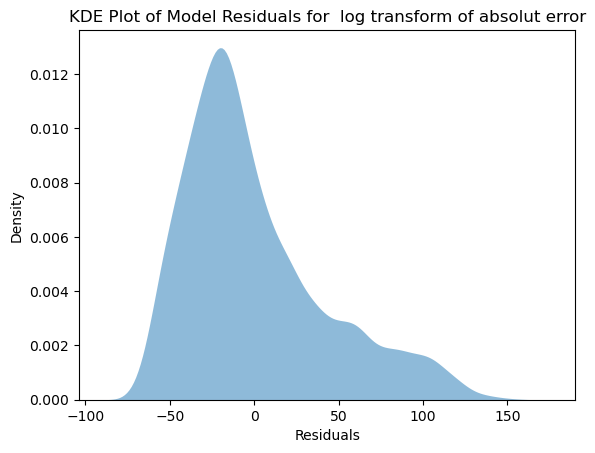

In [28]:
#Plotting residual to check for a normal distribution
ax = sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
ax.set_title("KDE Plot of Model Residuals for  log transform of absolut error")
ax.set_xlabel("Residuals")

In [29]:
# Response Time predicted by FRS
formula = "np.log(RT) ~ Global + Overview + Cardinal"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(RT)
No. Observations: 9381    Method:             REML      
No. Groups:       28      Scale:              0.4037    
Min. group size:  329     Log-Likelihood:     -9120.1481
Max. group size:  336     Converged:          Yes       
Mean group size:  335.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      1.986    0.247  8.057 0.000  1.503  2.469
Global         0.039    0.059  0.662 0.508 -0.076  0.154
Overview      -0.073    0.040 -1.841 0.066 -0.151  0.005
Cardinal      -0.009    0.052 -0.167 0.868 -0.110  0.093
Group Var      0.073    0.034                           



## Avatar questionnaire analysis

In [46]:
# Response time predicted by Avatar Presence



Unnamed: 0   ID  Alter   Global  Overview  Cardinal  AffiliativeQ_average  \
0           0  365    37.0     5.6  6.285714       2.5                   5.2   
1           1  365    37.0     5.6  6.285714       2.5                   5.2   
2           2  365    37.0     5.6  6.285714       2.5                   5.2   
3           3  365    37.0     5.6  6.285714       2.5                   5.2   
4           4  365    37.0     5.6  6.285714       2.5                   5.2   

   item3  ContextQ_average  remember_action_likert  ...  TrialNumber  \
0    2.0               3.5                2.714286  ...          1.0   
1    2.0               3.5                2.714286  ...         78.0   
2    2.0               3.5                2.714286  ...         88.0   
3    2.0               3.5                2.714286  ...         95.0   
4    2.0               3.5                2.714286  ...        131.0   

   StartPointID  ID_for_StartingPosition  avatarID  AvatarPresenceCategory  \
0             1                      1.0        46                 Present   
1             7                      6.0        46                 Omitted   
2             8                      4.0        46                 Present   
3             8                     11.0        46                 Omitted   
4            11                     11.0        46                 Omitted   

   Context  meaningfulBuilding  ImageName  \
0    False      Not meaningful      46_Sa   
1    False      Not meaningful    46_SaNo   
2    False      Not meaningful      46_Sa   
3    False      Not meaningful    46_SaNo   
4    False      Not meaningful    46_SaNo   

                                     ID_StartPointID  \
0  0        365\n1        365\n2        365\n3   ...   
1  0        365\n1        365\n2        365\n3   ...   
2  0        365\n1        365\n2        365\n3   ...   
3  0        365\n1        365\n2        365\n3   ...   
4  0        365\n1        365\n2        365\n3   ...   

   ID_PointingTaskStartingLocations  
0                            365_21  
1                            365_16  
2                            365_13  
3                            365_13  
4                             365_8  

[5 rows x 31 columns]

In [13]:
# Load the datasets
Face = pd.read_csv("/Volumes/TwoTeras/0_Experiment_1/Proxemics/Minimal_Distances_Experiment_One_Faces.csv")
Face_Group = pd.DataFrame(Face.groupby(['SubjectID', 'Session', 'ped_id'])['minimal_distance'].median())
Face_Group.reset_index(inplace=True)

In [15]:
Face.head()

Unnamed: 0.1  Unnamed: 0  ped_id  minimal_distance  num_interactions  \
0             0           0   46_Sa          7.496148                 1   
1             1           1  03_Cma          1.606597                 1   
2             2           2  22_Cma          3.535074                 1   
3             3           3  19_Cma          2.241916                 1   
4             4           4   50_Sa          2.402347                 1   

   SubjectID  Session Agent_Type  
0        479        2    Passive  
1        479        2     Active  
2        479        2     Active  
3        479        2     Active  
4        479        2    Passive

In [78]:
# Pivoting to get 'SubjectID' as rows and 'Session' as columns with minimal_distance as values
pivot_df_grouped = Face_Group.pivot(index='SubjectID', columns='Session', values='minimal_distance')
# After pivoting, reset the index to remove the multi-index structure
pivot_df_grouped_reset = pivot_df_grouped.reset_index()
# Renaming the columns 1 till 5 with the prefix 'session_'
pivot_df_grouped_reset.columns = ['SubjectID'] + [f'session_{col}' for col in pivot_df_grouped_reset.columns[1:]]

# Now 'SubjectID' is a regular column rather than an index
pivot_df_grouped_reset.head()

SubjectID  session_1  session_2  session_3  session_4  session_5
0        365   6.675141        NaN   6.307428   7.011704   7.116370
1        479   7.220254   2.638774   3.385938        NaN   5.302975
2       1754   4.262091   2.699252   3.398182   5.789655        NaN
3       2258   4.465834   5.724174   2.723882   4.581072   4.028636
4       2361   6.697929   4.087005   4.465046   5.115959   4.849128

In [65]:
# Isolating the avatar Quest variables for correlation
HumanAavatarQ = HumanAf[['ID', 'remember_action_likert', 'remember_standing_likert', 'attractive_action_likert', 'attractive_standing_likert', 'realistic_action_likert', 'realistic_standing_likert' ]]
HumanAavatarQ.head()
HumanAavatarQ.shape

(9381, 7)

In [66]:
pivot_df_grouped_reset.shape

(30, 6)

In [68]:
common_df.shape

(9381, 13)

In [64]:
# Ensure both 'SubjectID' and 'ID' columns are strings before merging
pivot_df_grouped_reset['SubjectID'] = pivot_df_grouped_reset['SubjectID'].astype(str)
HumanAavatarQ['ID'] = HumanAavatarQ['ID'].astype(str)

# Merging the two dataframes based on the common IDs
common_df = pd.merge(pivot_df_grouped_reset, HumanAavatarQ, left_on='SubjectID', right_on='ID')
common_df.head()

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/1481353464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HumanAavatarQ['ID'] = HumanAavatarQ['ID'].astype(str)


SubjectID  session_1  session_2  session_3  session_4  session_5   ID  \
0       365   6.675141        NaN   6.307428   7.011704    7.11637  365   
1       365   6.675141        NaN   6.307428   7.011704    7.11637  365   
2       365   6.675141        NaN   6.307428   7.011704    7.11637  365   
3       365   6.675141        NaN   6.307428   7.011704    7.11637  365   
4       365   6.675141        NaN   6.307428   7.011704    7.11637  365   

   remember_action_likert  remember_standing_likert  attractive_action_likert  \
0                2.714286                  1.107143                  2.214286   
1                2.714286                  1.107143                  2.214286   
2                2.714286                  1.107143                  2.214286   
3                2.714286                  1.107143                  2.214286   
4                2.714286                  1.107143                  2.214286   

   attractive_standing_likert  realistic_action_likert  \
0                    1.178571                 3.392857   
1                    1.178571                 3.392857   
2                    1.178571                 3.392857   
3                    1.178571                 3.392857   
4                    1.178571                 3.392857   

   realistic_standing_likert  
0                   1.964286  
1                   1.964286  
2                   1.964286  
3                   1.964286  
4                   1.964286

In [95]:
common_df.columns

Index(['SubjectID', 'session_1', 'session_2', 'session_3', 'session_4',
       'session_5', 'ID', 'remember_action_likert', 'remember_standing_likert',
       'attractive_action_likert', 'attractive_standing_likert',
       'realistic_action_likert', 'realistic_standing_likert'],
      dtype='object')

<Axes: xlabel='session_1', ylabel='realistic_action_likert'>

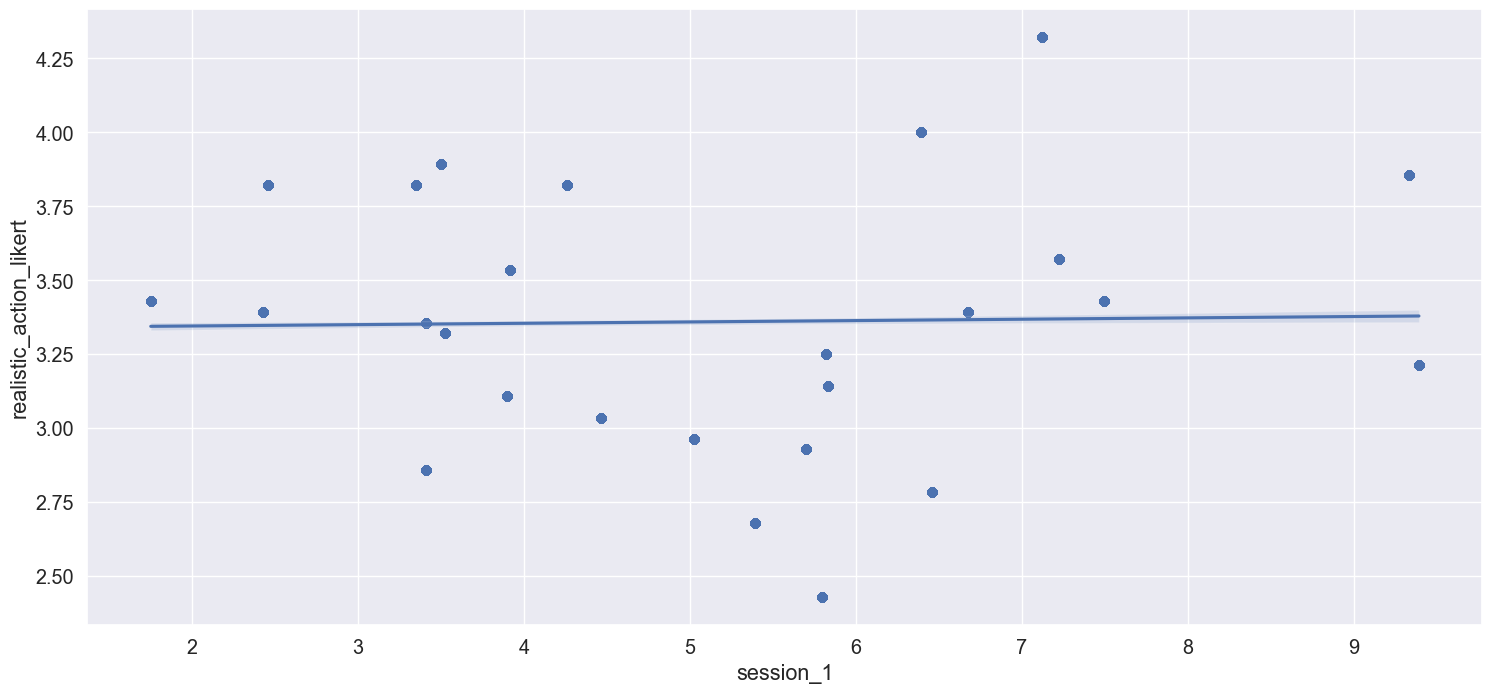

In [94]:
sns.regplot(x='session_1', y='realistic_action_likert', data=common_df)

In [76]:
cor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   session_1  28 non-null     float64
 1   session_2  26 non-null     float64
 2   session_3  27 non-null     float64
 3   session_4  26 non-null     float64
 4   session_5  26 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


In [81]:
cor_data.head()

session_1  session_2  session_3  session_4  session_5
0   6.675141        NaN   6.307428   7.011704   7.116370
1   7.220254   2.638774   3.385938        NaN   5.302975
2   4.262091   2.699252   3.398182   5.789655        NaN
3   4.465834   5.724174   2.723882   4.581072   4.028636
4   6.697929   4.087005   4.465046   5.115959   4.849128

In [84]:
row_wise_corr.head()

0         1         2         3         4
0  1.000000  0.243489  0.470697  0.508768  0.042095
1  0.243489  1.000000  0.493683 -0.081215  0.948599
2  0.470697  0.493683  1.000000 -0.073746  0.464005
3  0.508768 -0.081215 -0.073746  1.000000 -0.023691
4  0.042095  0.948599  0.464005 -0.023691  1.000000

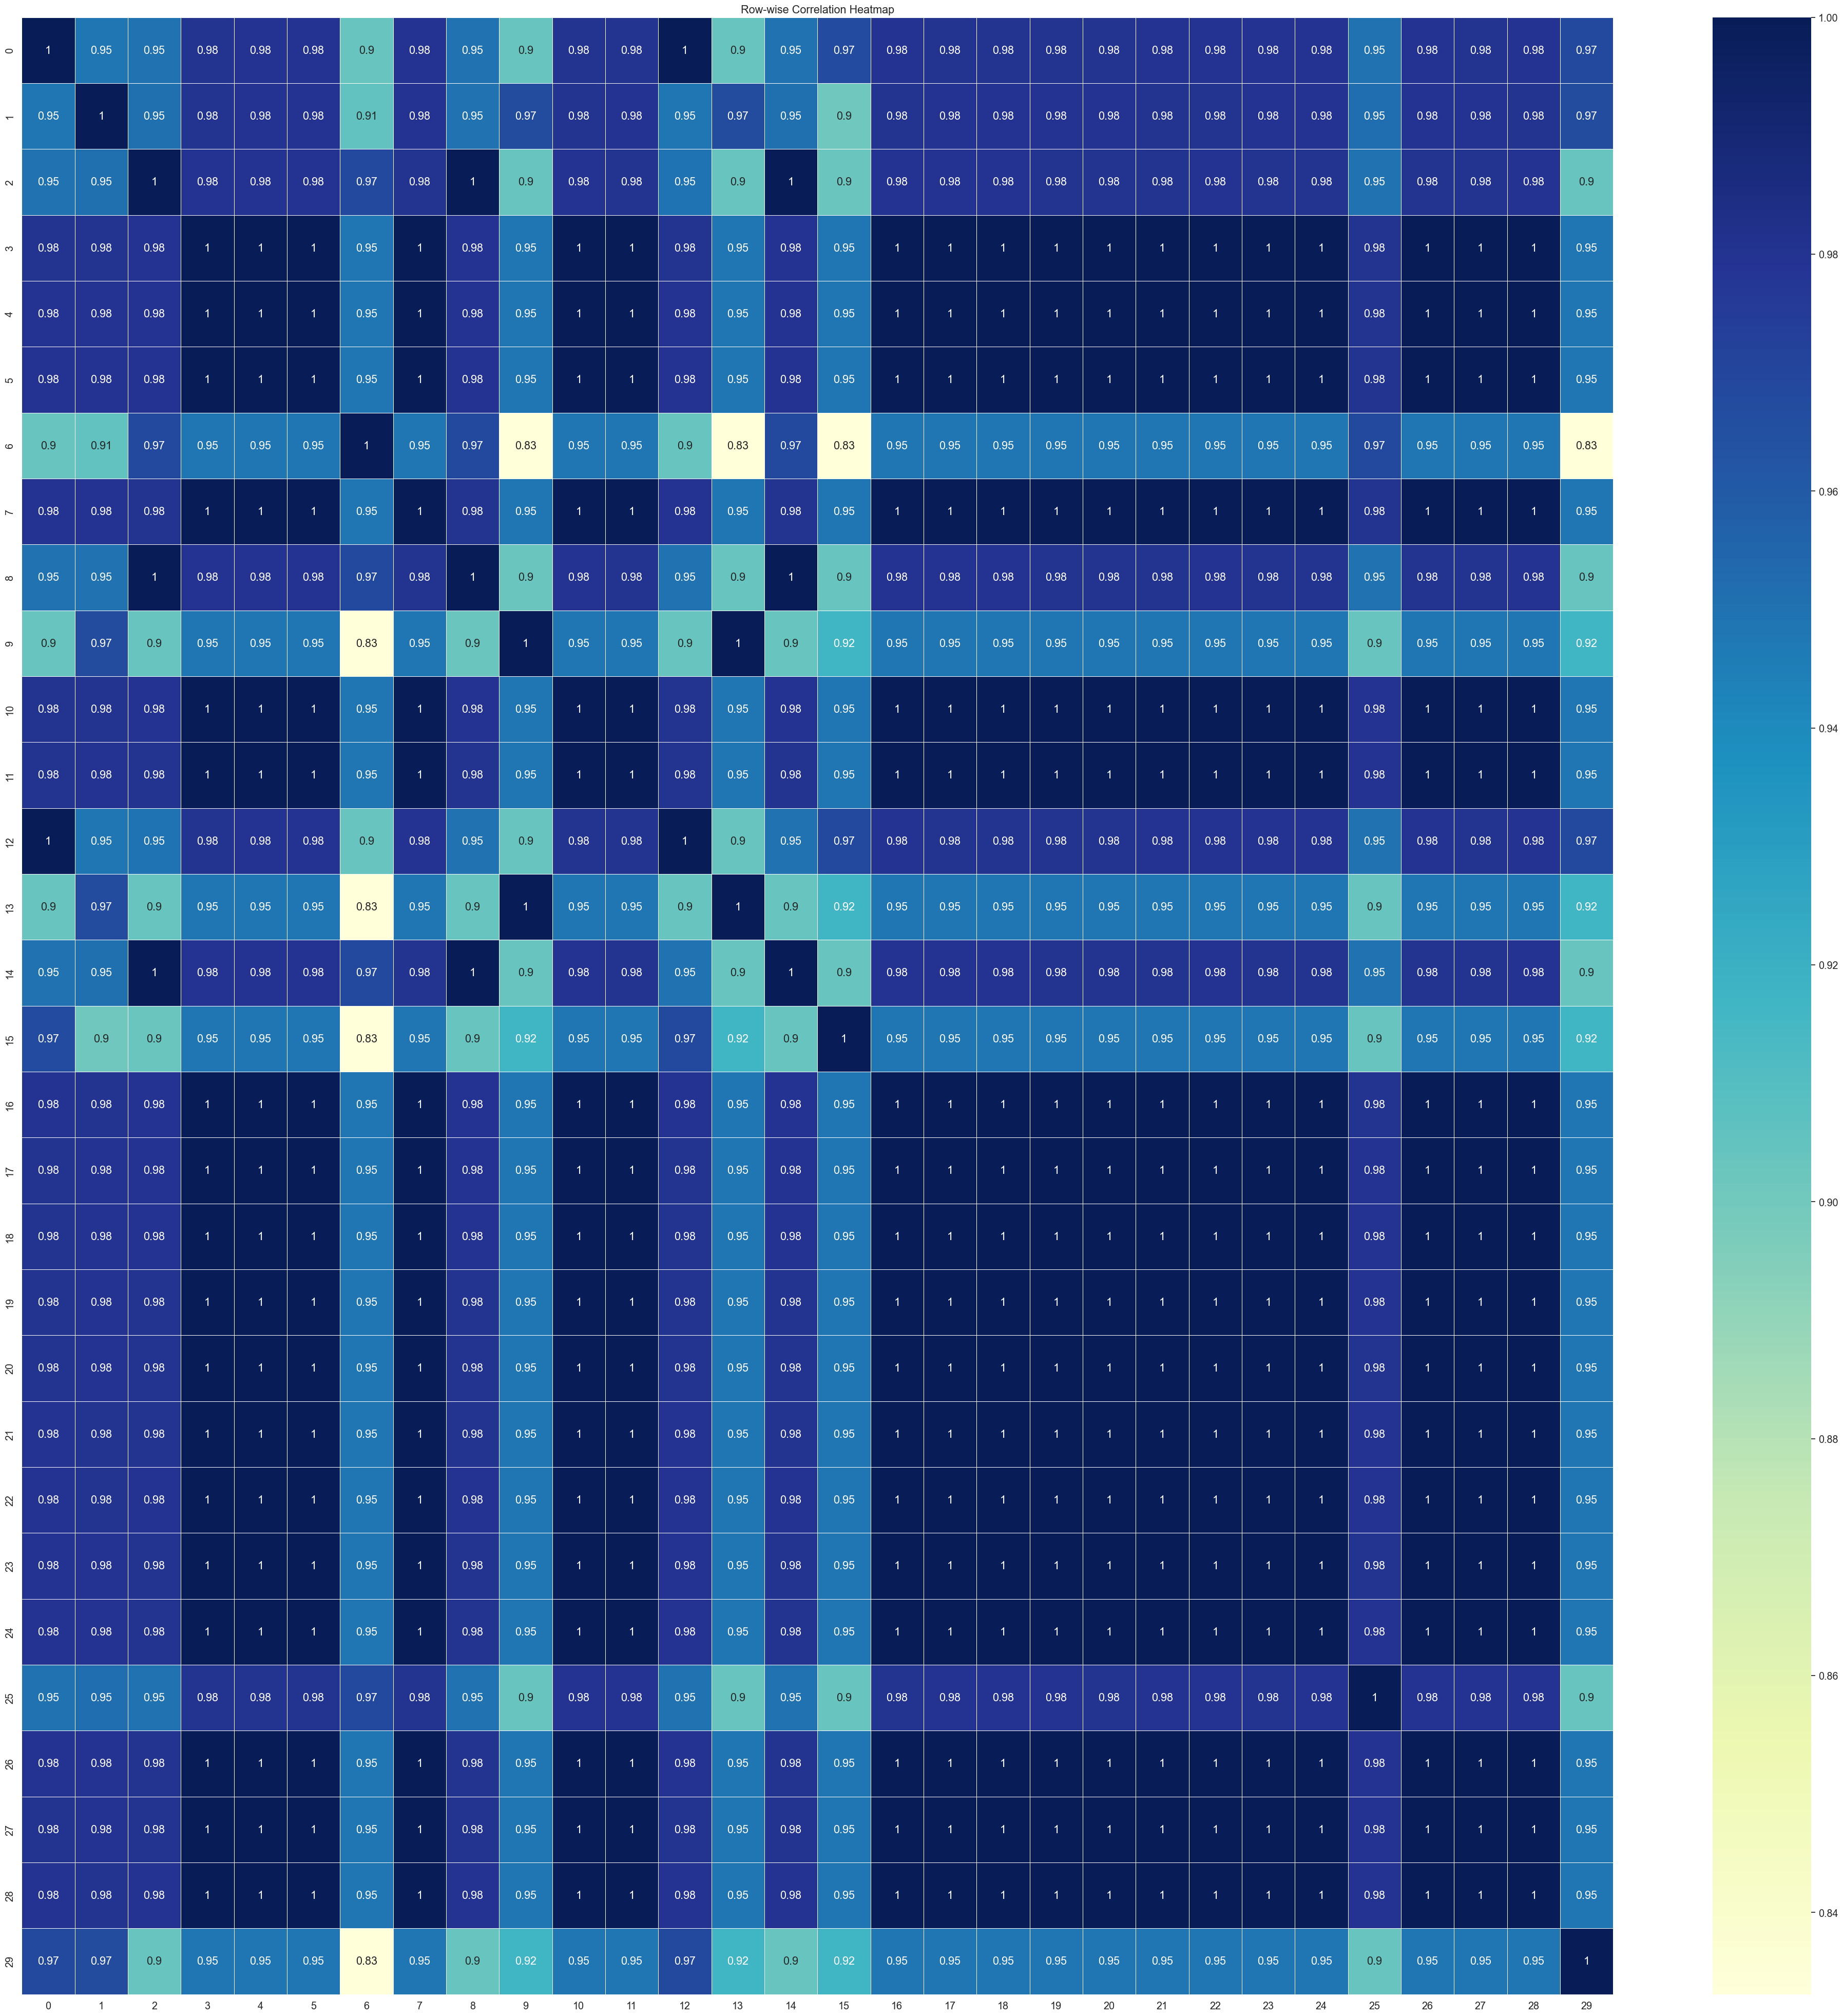

In [88]:
# Fill NaN values with the mean of each row to avoid correlation calculation issues
df_filled = pivot_df_grouped_reset.apply(lambda row: row.fillna(row.mean()), axis=1)

# Calculate row-wise correlation by transposing the DataFrame
row_wise_corr = df_filled.transpose().corr()

# Plot the row-wise correlation as a heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(row_wise_corr, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Row-wise Correlation Heatmap")
plt.show()

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/1163769564.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  initial_cmap = cm.get_cmap('YlGnBu')
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


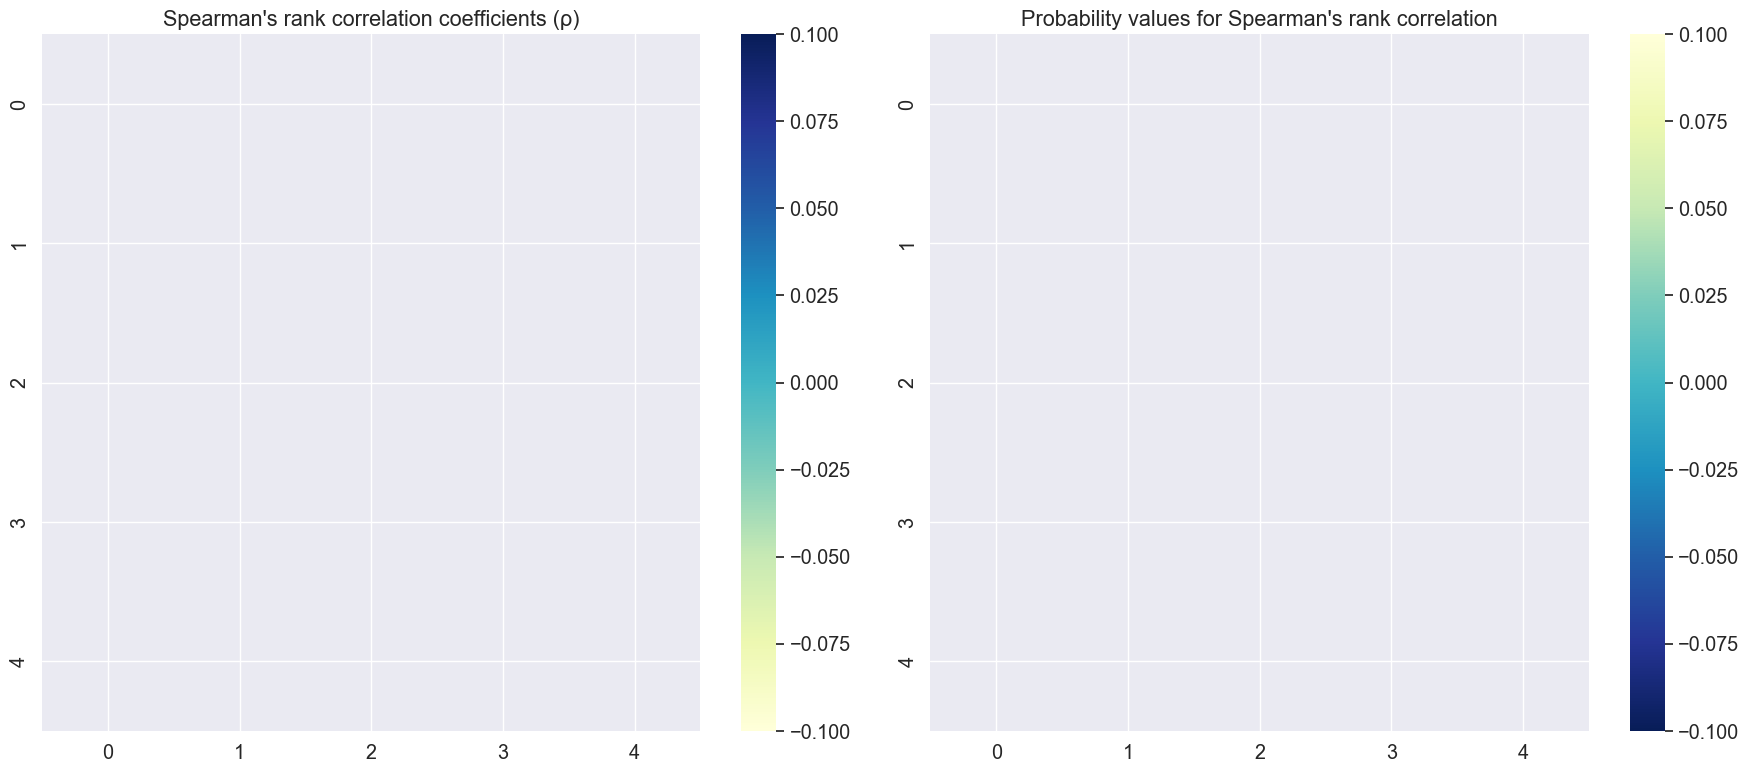

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib import cm

# Assuming cor_data is already prepared and does not contain 'SubjectID'
cor_data = pivot_df_grouped_reset.drop(columns=['SubjectID'])

# Create Pearson's correlation matrix
corrMatrix = cor_data.corr()

# Create a mask to hide the upper triangle of the matrix (since it's symmetric)
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

# Calculate Spearman's rank correlation and p-values
cor, pval = stats.spearmanr(cor_data)

# Set up the figure size and color map
sns.set(rc={"figure.figsize": (18, 8)})
sns.set(font_scale=1.3)
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap = initial_cmap.reversed()

# Create subplots for the two heatmaps
fig, ax = plt.subplots(nrows=1, ncols=2)

# Plot Spearman's rank correlation coefficients heatmap
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients (ρ)")

# Plot p-values heatmap for Spearman's rank correlation
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/792426711.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  initial_cmap = cm.get_cmap('YlGnBu')


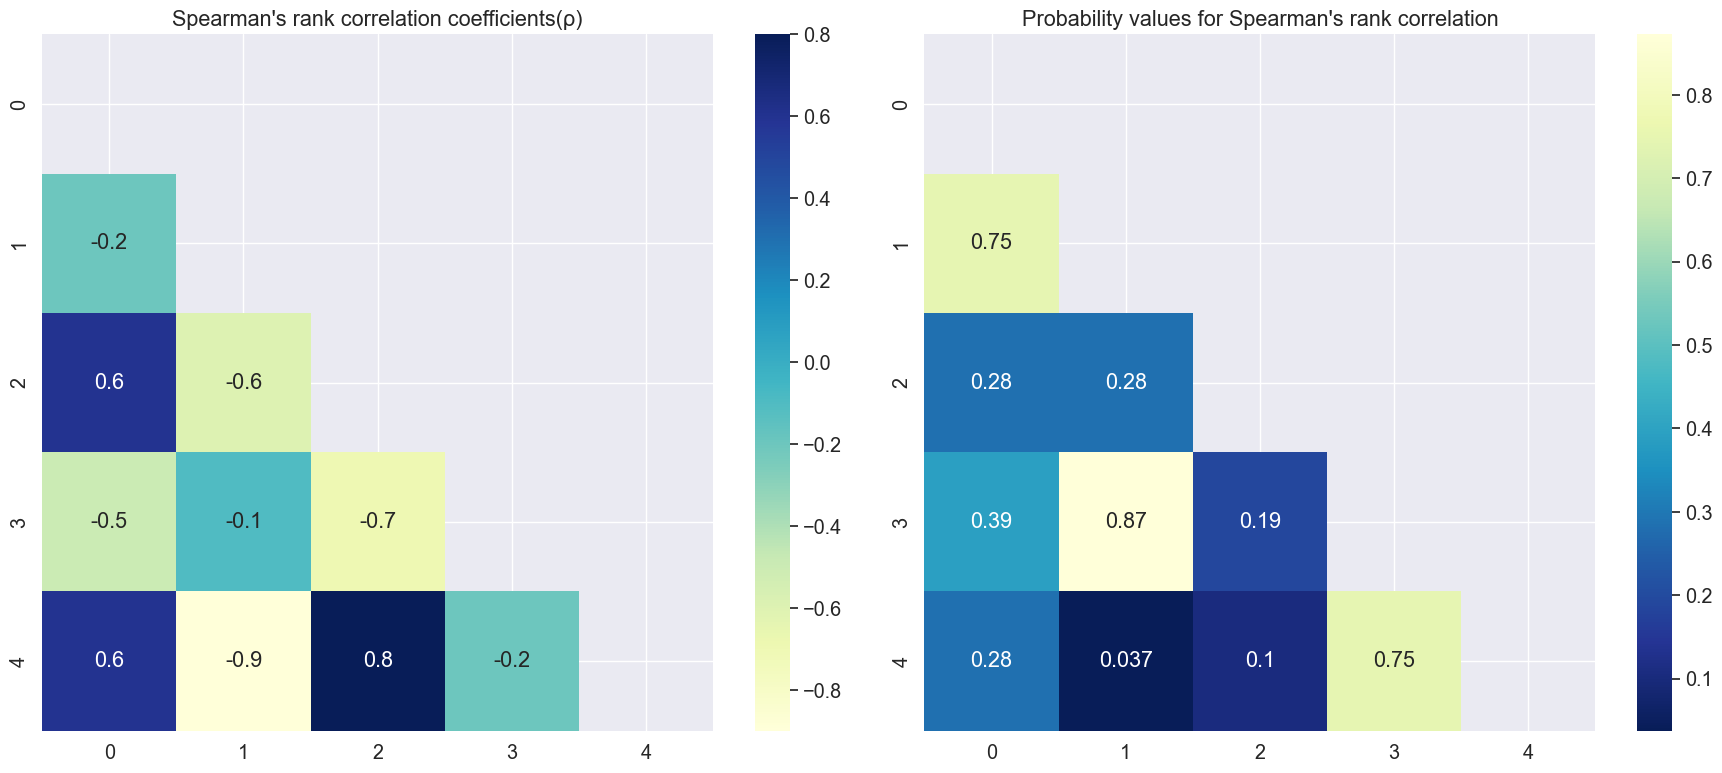

In [73]:
sns.set(rc={"figure.figsize":(18, 8)})
sns.set(font_scale = 1.3)
from matplotlib import cm
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()

common_df
fig, ax = plt.subplots(nrows=1,ncols=2)

cor_data = pivot_df_grouped_reset.drop(columns=['SubjectID']) # Dropping the 'SubjectID' column but keeping everything else

#Calculates pearsons r matrix
corrMatrix = cor_data.corr()
#Creates a mask that eliminates the 1s
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
#Calculates spearmans s
cor, pval = stats.spearmanr(corrMatrix.T)
#Heatmap plotting
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")
#sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", mask=mask,ax=[2])

#for ax in ax.ravel():
    #ax.set_xticklabels(['Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful'], rotation=80);
    #ax.set_yticklabels(['Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful'], rotation=360);
plt.tight_layout()
plt.show()

In [33]:
stats.spearmanr(HumanAavatarQ.remember_standing_likert, HumanAavatarQ.remember_action_likert)


SignificanceResult(statistic=0.6121283746824386, pvalue=0.0)

In [34]:
HumanAavatarQ.head()

remember_action_likert  remember_standing_likert  attractive_action_likert  \
0                2.714286                  1.107143                  2.214286   
1                2.714286                  1.107143                  2.214286   
2                2.714286                  1.107143                  2.214286   
3                2.714286                  1.107143                  2.214286   
4                2.714286                  1.107143                  2.214286   

   attractive_standing_likert  realistic_action_likert  \
0                    1.178571                 3.392857   
1                    1.178571                 3.392857   
2                    1.178571                 3.392857   
3                    1.178571                 3.392857   
4                    1.178571                 3.392857   

   realistic_standing_likert  
0                   1.964286  
1                   1.964286  
2                   1.964286  
3                   1.964286  
4                   1.964286

## Calculating a factorial analysis on the questionnaire

In [35]:
AvatarQuest= pd.read_csv('/Users/tracysanchezpacheco/Documents/Resources/AvatarQuestcsv.csv')
AvatarQuest.drop('Unnamed: 0', axis=1, inplace=True)
AvatarQuest.head()

ID  Atractive 1  Atractive 2  Atractive 3  Atractive 4  Atractive 5  \
0   365            1            3            2            2            3   
1   479            1            1            1            1            1   
2  1754            3            4            4            3            5   
3  2258            2            2            2            2            2   
4  2693            1            4            2            1            1   

   Atractive 6  Atractive 7  Atractive 8  Atractive 9  ...  Remember 47  \
0            4            2            2            5  ...            1   
1            1            1            1            1  ...            1   
2            4            3            3            4  ...            1   
3            3            2            2            2  ...            2   
4            2            1            1            3  ...            1   

   Remember 48  Remember 49  Remember 50  Remember 51  Remember 52  \
0            1            1            1            1            1   
1            3            1            5            3            2   
2            2            1            1            1            1   
3            2            2            1            1            2   
4            1            1            1            1            1   

   Remember 53  Remember 54  Remember 55  Remember 56  
0            1            1            1            1  
1            2            1            3            3  
2            1            1            1            1  
3            1            1            2            3  
4            1            1            1            1  

[5 rows x 169 columns]

In [36]:
b = list(range(1,57))
Attractive= AvatarQuest.iloc[: , b].copy()
Attractive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Atractive 1   30 non-null     int64
 1   Atractive 2   30 non-null     int64
 2   Atractive 3   30 non-null     int64
 3   Atractive 4   30 non-null     int64
 4   Atractive 5   30 non-null     int64
 5   Atractive 6   30 non-null     int64
 6   Atractive 7   30 non-null     int64
 7   Atractive 8   30 non-null     int64
 8   Atractive 9   30 non-null     int64
 9   Atractive 10  30 non-null     int64
 10  Atractive 11  30 non-null     int64
 11  Atractive 12  30 non-null     int64
 12  Atractive 13  30 non-null     int64
 13  Atractive 14  30 non-null     int64
 14  Atractive 15  30 non-null     int64
 15  Atractive 16  30 non-null     int64
 16  Atractive 17  30 non-null     int64
 17  Atractive 18  30 non-null     int64
 18  Atractive 19  30 non-null     int64
 19  Atractive 20  30 non-null     i

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/2260104957.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  initial_cmap = cm.get_cmap('YlGnBu')


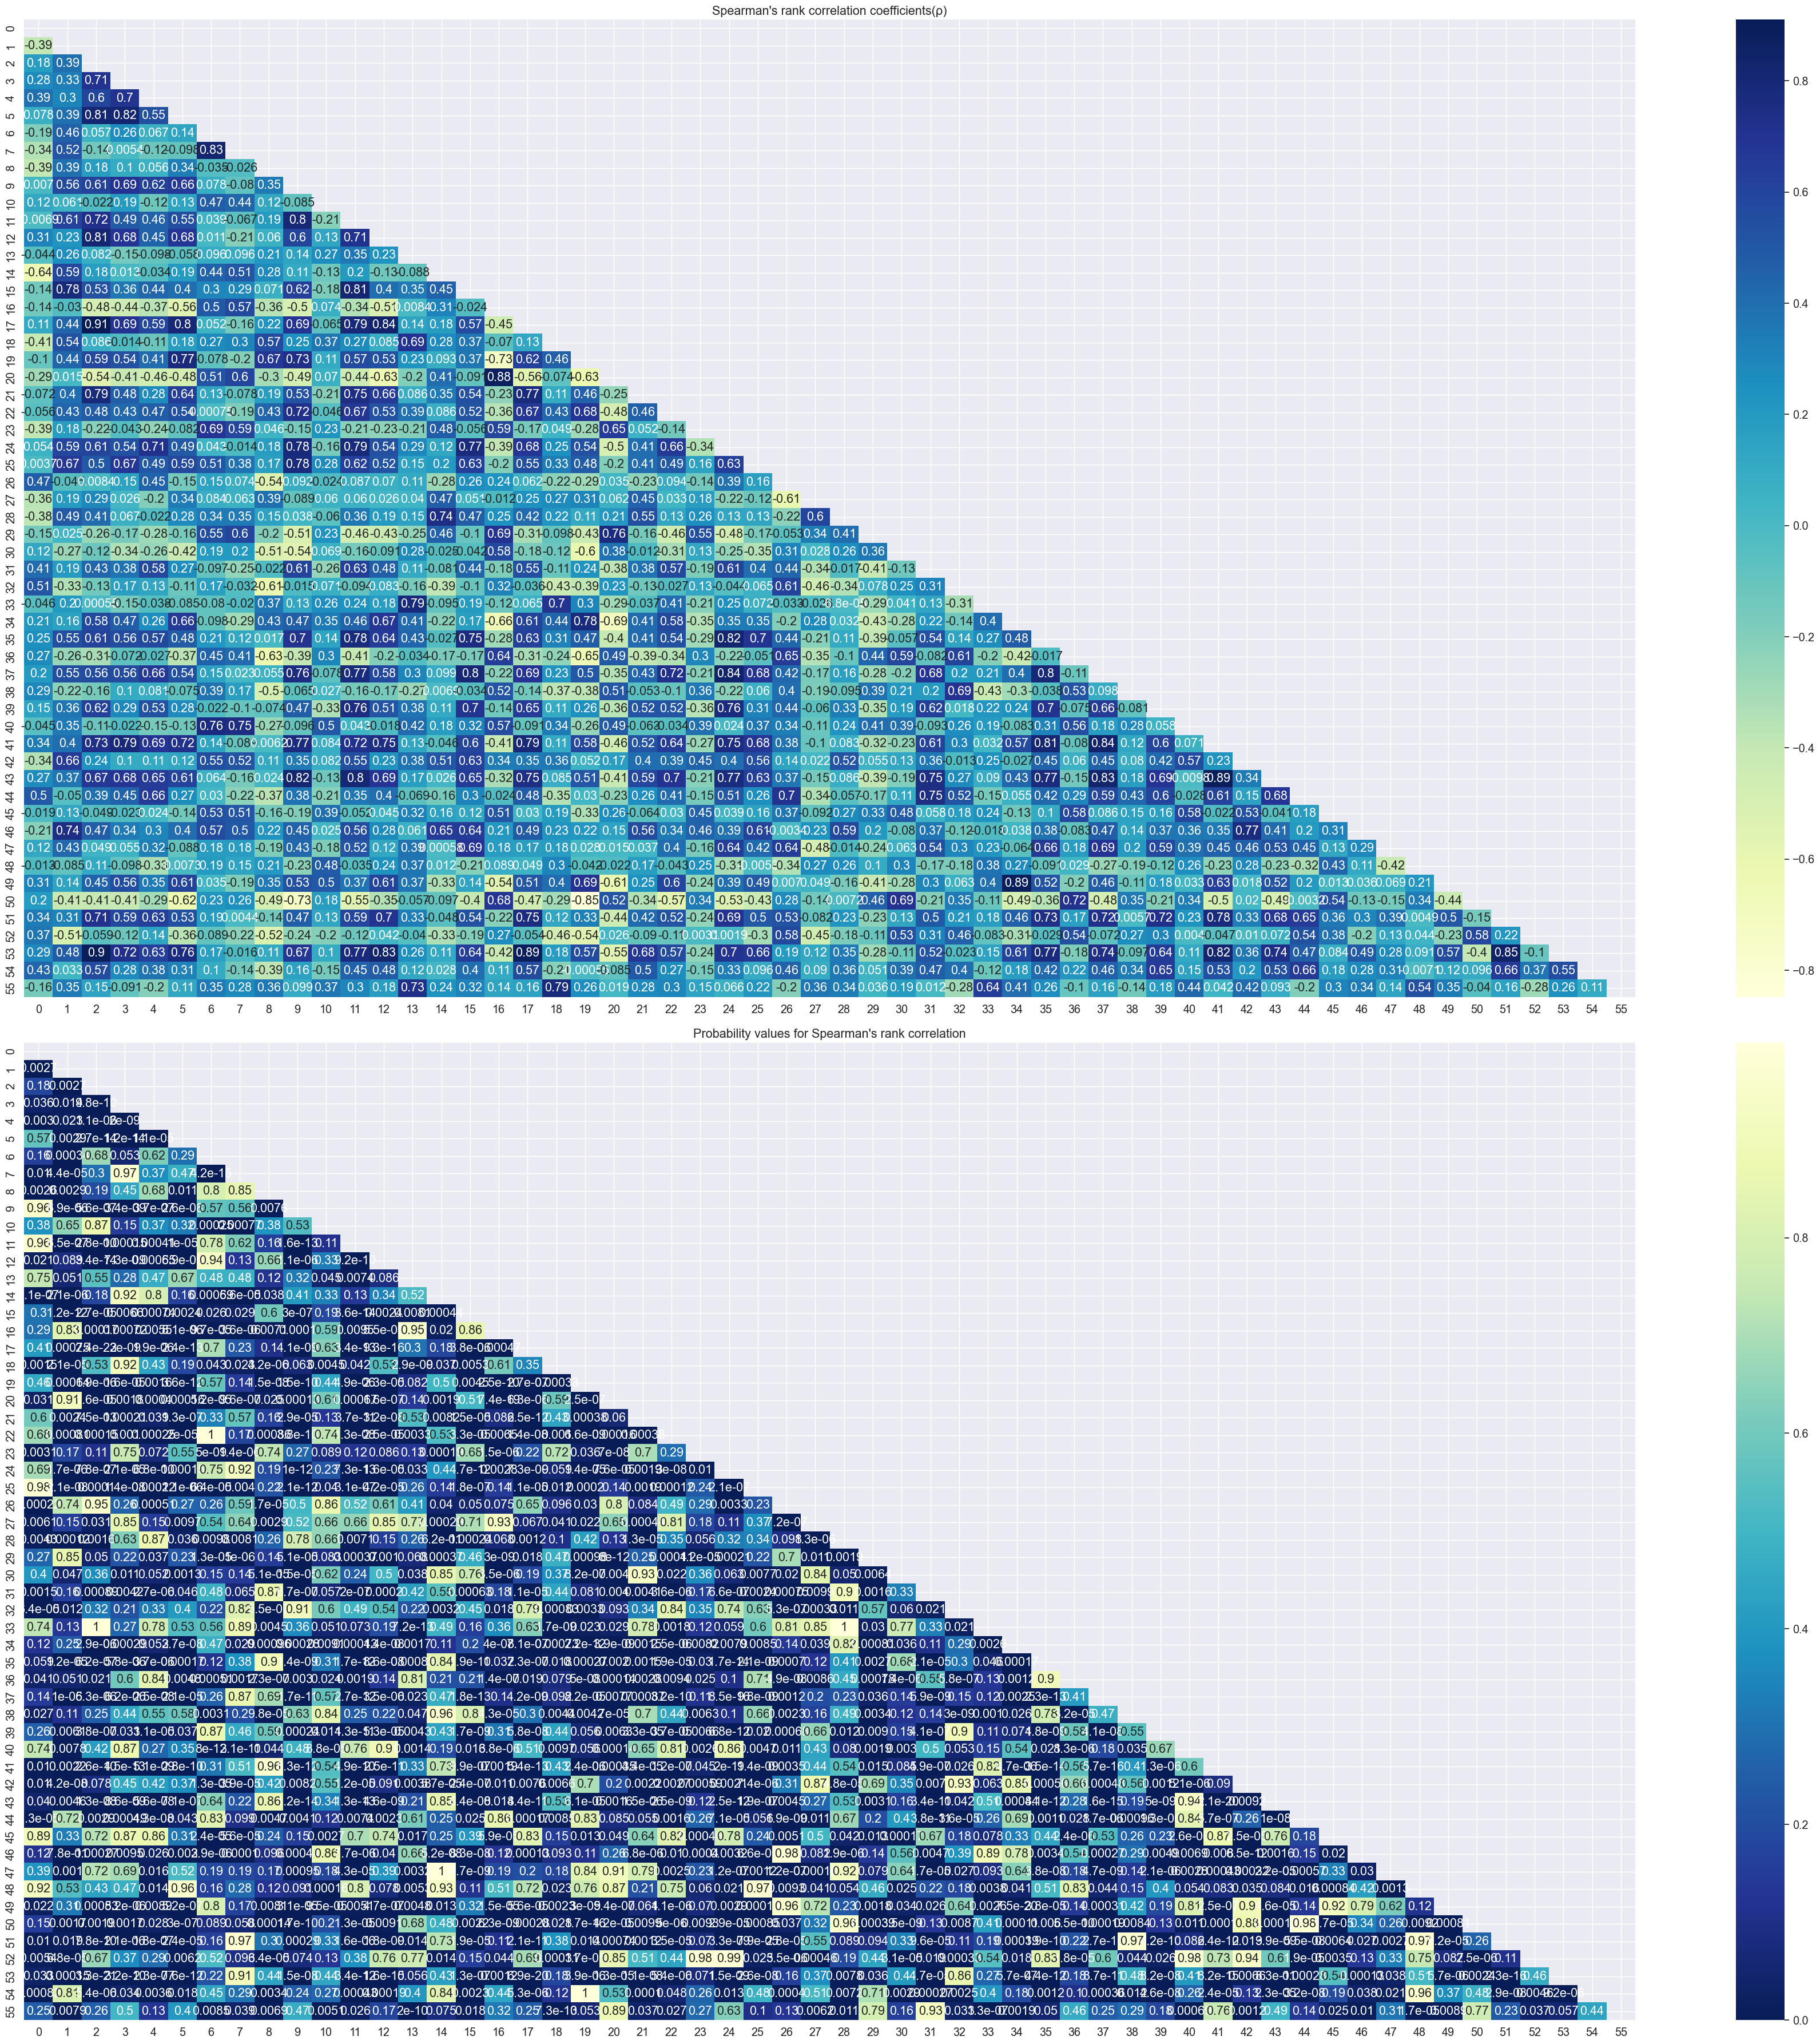

In [37]:
sns.set(rc={"figure.figsize":(36, 36)})
sns.set(font_scale = 1.3)
from matplotlib import cm
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()

fig, ax = plt.subplots(nrows=2,ncols=1)

#Calculates pearsons r matrix
corrMatrix = Attractive.corr()
#Creates a mask that eliminates the 1s
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
#Calculates spearmans s
cor, pval = stats.spearmanr(corrMatrix.T)
#Heatmap plotting
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")
#sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", mask=mask,ax=[2])
plt.tight_layout()
plt.show()

In [38]:
corrMatrix.T

Atractive 1  Atractive 2  Atractive 3  Atractive 4  Atractive 5  \
Atractive 1      1.000000     0.006922     0.276235     0.196963     0.430244   
Atractive 2      0.006922     1.000000     0.378772     0.231329     0.289031   
Atractive 3      0.276235     0.378772     1.000000     0.532696     0.485845   
Atractive 4      0.196963     0.231329     0.532696     1.000000     0.703310   
Atractive 5      0.430244     0.289031     0.485845     0.703310     1.000000   
Atractive 6      0.149169     0.371288     0.723234     0.627201     0.497945   
Atractive 7      0.152270     0.507513     0.438969     0.500996     0.476926   
Atractive 8      0.048309     0.488679     0.234222     0.364540     0.256286   
Atractive 9      0.015997     0.374044     0.198427     0.236045     0.363079   
Atractive 10     0.118983     0.443185     0.400283     0.608597     0.492454   
Atractive 11     0.302289     0.372784     0.240780     0.469016     0.257586   
Atractive 12     0.165521     0.463293     0.545367     0.391406     0.330859   
Atractive 13     0.247780     0.279372     0.652155     0.552020     0.295593   
Atractive 14     0.074596     0.271745     0.256587     0.126755     0.212242   
Atractive 15    -0.235239     0.478183     0.332133     0.331150     0.362354   
Atractive 16     0.102630     0.519815     0.430950     0.428711     0.439997   
Atractive 17     0.075174     0.331088     0.071593     0.201870     0.172153   
Atractive 18     0.189648     0.481736     0.766753     0.533402     0.484808   
Atractive 19    -0.136846     0.430507     0.174334     0.157492     0.170748   
Atractive 20     0.092678     0.411731     0.449340     0.487330     0.408597   
Atractive 21     0.027489     0.251823    -0.038079     0.131231     0.023424   
Atractive 22     0.051682     0.182098     0.673624     0.388786     0.132117   
Atractive 23     0.006414     0.350310     0.364309     0.352155     0.399004   
Atractive 24    -0.029017     0.340799     0.227778     0.330926     0.255501   
Atractive 25     0.135893     0.498554     0.484201     0.454794     0.574208   
Atractive 26     0.116811     0.538215     0.410757     0.550506     0.375177   
Atractive 27     0.326140     0.185344     0.214964     0.326466     0.519960   
Atractive 28     0.091943     0.203159     0.348635     0.156231     0.102249   
Atractive 29     0.001767     0.516846     0.522691     0.329050     0.335831   
Atractive 30     0.109955     0.251823     0.019040     0.262462     0.163965   
Atractive 31     0.226194     0.092672     0.276902     0.238571     0.219638   
Atractive 32     0.505326     0.304878     0.364388     0.355255     0.554469   
Atractive 33     0.319187     0.034080     0.073693     0.323230     0.156598   
Atractive 34     0.198765     0.187047     0.117148     0.111983     0.181995   
Atractive 35     0.341288     0.262617     0.513529     0.430737     0.270762   
Atractive 36     0.378659     0.462237     0.534867     0.540892     0.497967   
Atractive 37     0.196916     0.083258     0.190945     0.376030     0.302032   
Atractive 38     0.276850     0.462649     0.388988     0.490910     0.478558   
Atractive 39     0.402887    -0.021187     0.162433     0.325348     0.312563   
Atractive 40     0.150233     0.378097     0.600974     0.234191     0.410173   
Atractive 41     0.249129     0.430289     0.328191     0.287618     0.262237   
Atractive 42     0.272952     0.438016     0.537215     0.567675     0.432935   
Atractive 43    -0.077379     0.477119     0.328268     0.215487     0.214291   
Atractive 44     0.273084     0.408415     0.507566     0.619025     0.564173   
Atractive 45     0.376846     0.143774     0.380716     0.378146     0.492925   
Atractive 46     0.033579     0.330034     0.346420     0.303739     0.326795   
Atractive 47     0.240103     0.668603     0.520365     0.425222     0.481790   
Atractive 48     0.225254     0.425408     0.006241     0.129044     0.284076   
Atractive 49     0.261295     0.146035     0.

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8692/3754126108.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HumanAavatarQ.dropna(inplace=True);


33570.98703697524 0.0
0.37927318398904436


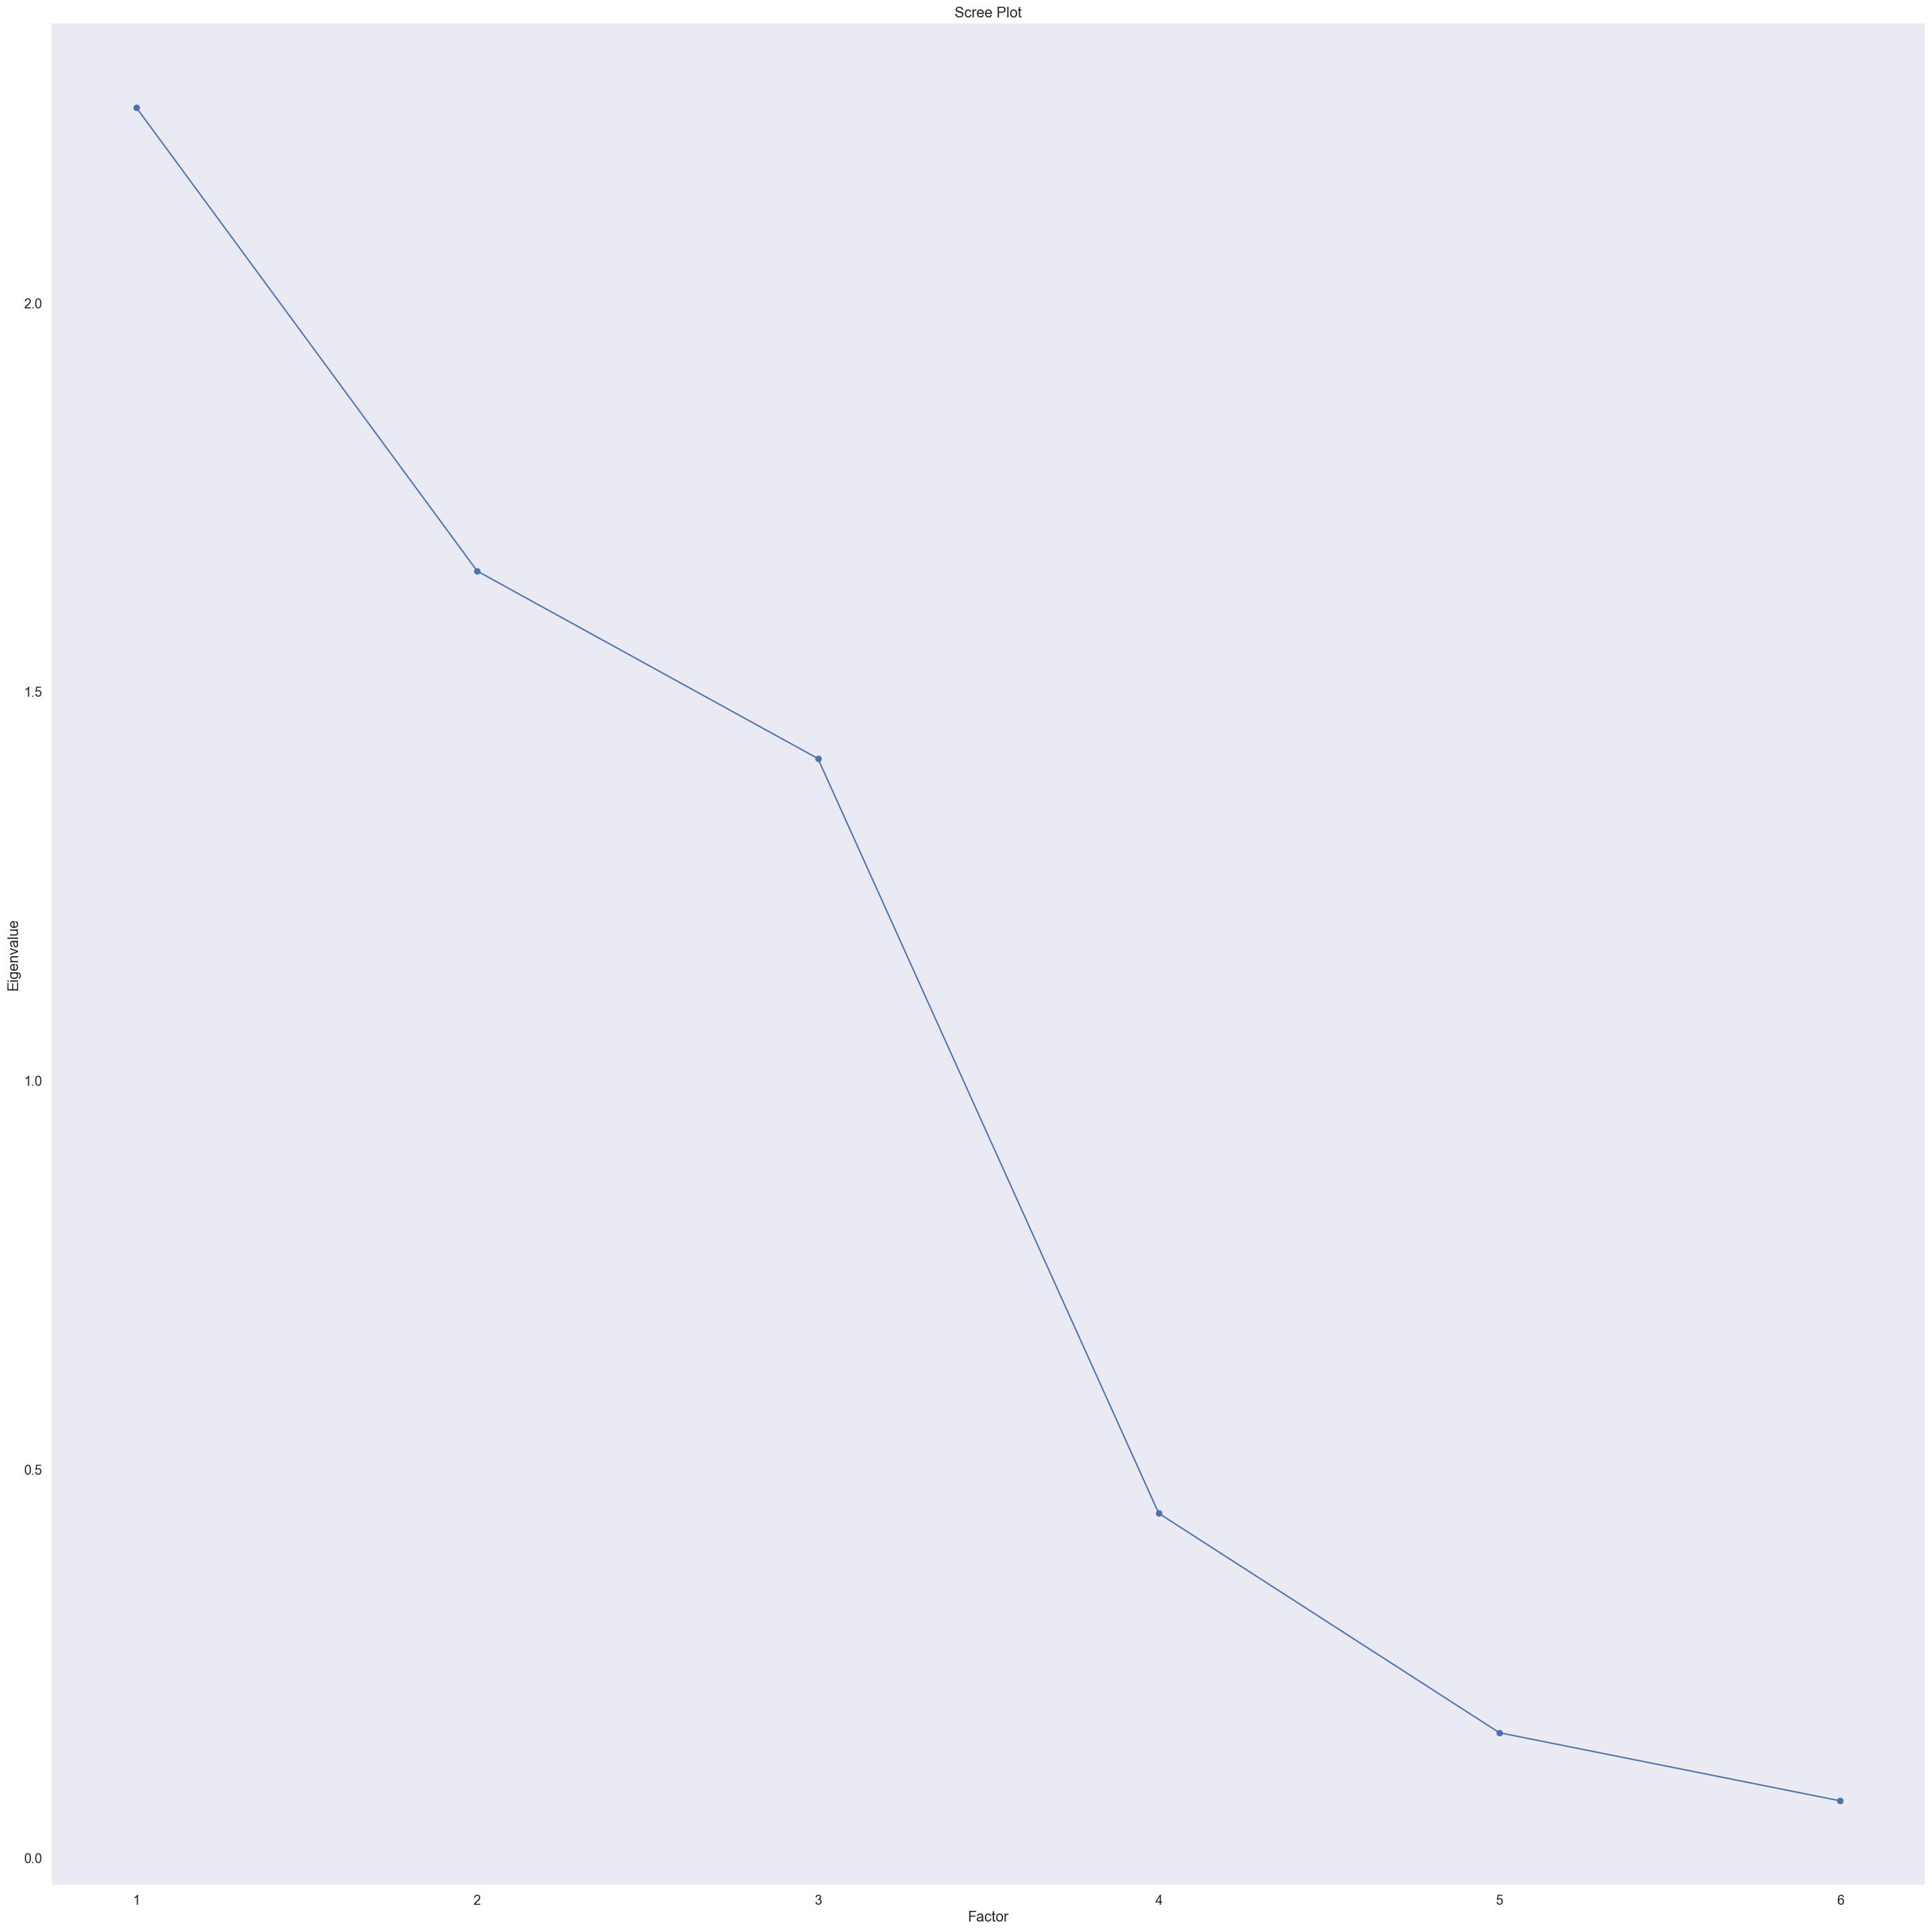

In [39]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Droppin Nas
HumanAavatarQ.dropna(inplace=True);

#Adecuacy test

#Barlets sphericity: A significative p value indicates the date is different from an identity matrix
chi_square_value,p_value= calculate_bartlett_sphericity(HumanAavatarQ)
print(chi_square_value,p_value)

# Kaiser-Meyer-Olkin (KMO): Estimates the proportion of variance among all observed variables, less than 0.6 is inadequate
kmo_all,kmo_model=calculate_kmo(HumanAavatarQ)
print(kmo_model)
#Create factor analysis object and perform analysis
fa= FactorAnalyzer(rotation='varimax')
fa.fit(HumanAavatarQ)

loadings = fa.loadings_

# Get the eigenvector
ev, v = fa.get_eigenvalues()

xvals = range(1, HumanAavatarQ.shape[1]+1)
plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [40]:
# Response time predicted by Avatar Presence
formula = "np.log(RT) ~ remember_action_likert + remember_standing_likert  + attractive_action_likert + attractive_standing_likert + realistic_action_likert + realistic_standing_likert"

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     np.log(RT)
No. Observations:      9381        Method:                 REML      
No. Groups:            28          Scale:                  0.4037    
Min. group size:       329         Log-Likelihood:         -9119.2885
Max. group size:       336         Converged:              Yes       
Mean group size:       335.0                                         
---------------------------------------------------------------------
                           Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------
Intercept                   1.530    0.495  3.092 0.002  0.560  2.500
remember_action_likert      0.075    0.120  0.627 0.531 -0.160  0.311
remember_standing_likert   -0.236    0.176 -1.341 0.180 -0.580  0.109
attractive_action_likert    0.341    0.221  1.541 0.123 -0.092  0.774
attractive_standing_likert -0.274   

In [41]:
import random
number = random.randint(1000,9999)
print(number)

4743


In [42]:
# Response time predicted by Avatar Presence
formula = "np.log(AbsolutError) ~ ContextQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(AbsolutError)
No. Observations: 9381    Method:             REML                
No. Groups:       28      Scale:              1.7221              
Min. group size:  329     Log-Likelihood:     -15915.5917         
Max. group size:  336     Converged:          Yes                 
Mean group size:  335.0                                           
-------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
-------------------------------------------------------------------
Intercept             3.042     0.317  9.586  0.000   2.420   3.664
ContextQ_average      0.045     0.064  0.711  0.477  -0.080   0.171
Group Var             0.218     0.047                              



In [43]:
# Response time predicted by Avatar Presence
formula = "remember_action_likert ~ AffiliativeQ_average "

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = HumanAf, groups=HumanAf['ID']).fit()
print(model_LM.summary())

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: remember_action_likert
No. Observations: 9381    Method:             REML                  
No. Groups:       28      Scale:              0.0000                
Min. group size:  329     Log-Likelihood:     128257.1482           
Max. group size:  336     Converged:          Yes                   
Mean group size:  335.0                                             
---------------------------------------------------------------------
                      Coef.  Std.Err.     z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept             2.023     0.019  105.023  0.000   1.985   2.061
AffiliativeQ_average  0.230     0.005   49.404  0.000   0.221   0.239
Group Var             0.001    57.544                                



/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


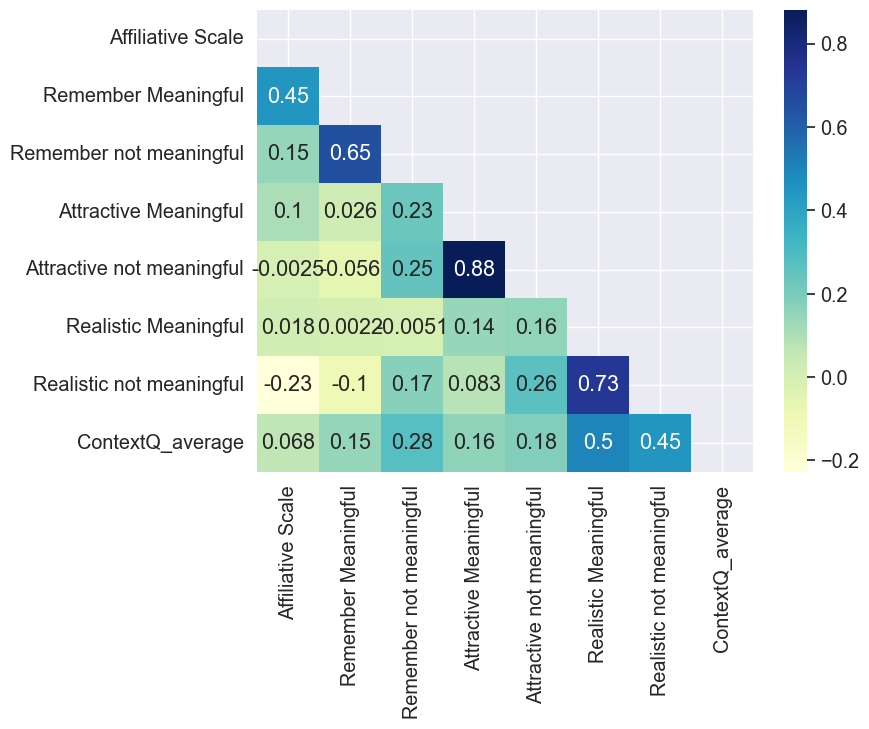

In [44]:
HumanAaffili = HumanAf[['AffiliativeQ_average', 'remember_action_likert', 'remember_standing_likert', 'attractive_action_likert', 'attractive_standing_likert', 'realistic_action_likert', 'realistic_standing_likert','ContextQ_average' ]]
corrMatrix = HumanAaffili.corr()

fig, ax = plt.subplots(figsize=(8,6))
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu", ax=ax, mask=mask)

ax.set_xticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average']);
ax.set_yticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average']);

In [45]:
sns.regplot('remember_action_likert', 'AffiliativeQ_average', data= HumanAaffili )

TypeError: regplot() got multiple values for argument 'data'

In [ ]:
sns.regplot('realistic_standing_likert', 'AffiliativeQ_average', data= HumanAaffili )

In [ ]:
import scipy.stats
r, p = scipy.stats.pearsonr(HumanAf.AffiliativeQ_average, HumanAf.realistic_standing_likert)
p

In [ ]:
sns.set(rc={"figure.figsize":(18, 8)})
sns.set(font_scale = 1.3)
from matplotlib import cm

fig, ax = plt.subplots(1,2)

cor, pval = stats.spearmanr(corrMatrix.T)
sns.heatmap(cor, annot=True, cmap="YlGnBu", mask=mask, ax=ax[0]).set(title="Spearman's rank correlation coefficients(ρ)")
initial_cmap = cm.get_cmap('YlGnBu')
reversed_cmap=initial_cmap.reversed()
sns.heatmap(pval, annot=True, cmap=reversed_cmap, mask=mask, ax=ax[1]).set(title="Probability values for Spearman's rank correlation")

for ax in ax.ravel():
    ax.set_xticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average'], rotation=60);
    ax.set_yticklabels(['Affiliative Scale', 'Remember Meaningful', 'Remember not meaningful', 'Attractive Meaningful', 'Attractive not meaningful', 'Realistic Meaningful', 'Realistic not meaningful', 'ContextQ_average'], rotation=360);
plt.tight_layout()
plt.show()

In [ ]:
HumanAf.info()

In [ ]:
# library & dataset
import matplotlib.pyplot as plt
import seaborn as sns

# with regression
sns.pairplot(HumanAaffili, kind="reg")
plt.show()